In [2]:
import os
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GroupKFold
import lightgbm as lgb 
from sklearn.metrics import root_mean_squared_error
import random
random.seed(42)
import pickle
pd.options.mode.chained_assignment = None

#### Import Data

In [5]:
full_data = pd.read_csv('full_data.csv')

train = full_data[full_data['pm2_5']!= - 1]
test = full_data[full_data['pm2_5']== - 1]

#### Exploratory Data Analysis

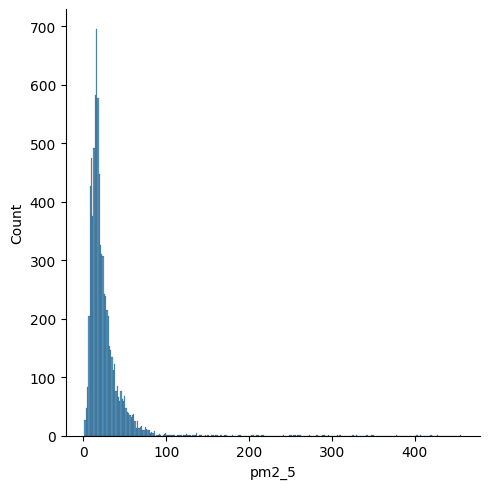

In [6]:
# what does the distribution of the target variable look like

# get the cleaned train from full_data
train = full_data[full_data['pm2_5']!= -1]

# plot the histogram distribution
sns.displot(train['pm2_5'])

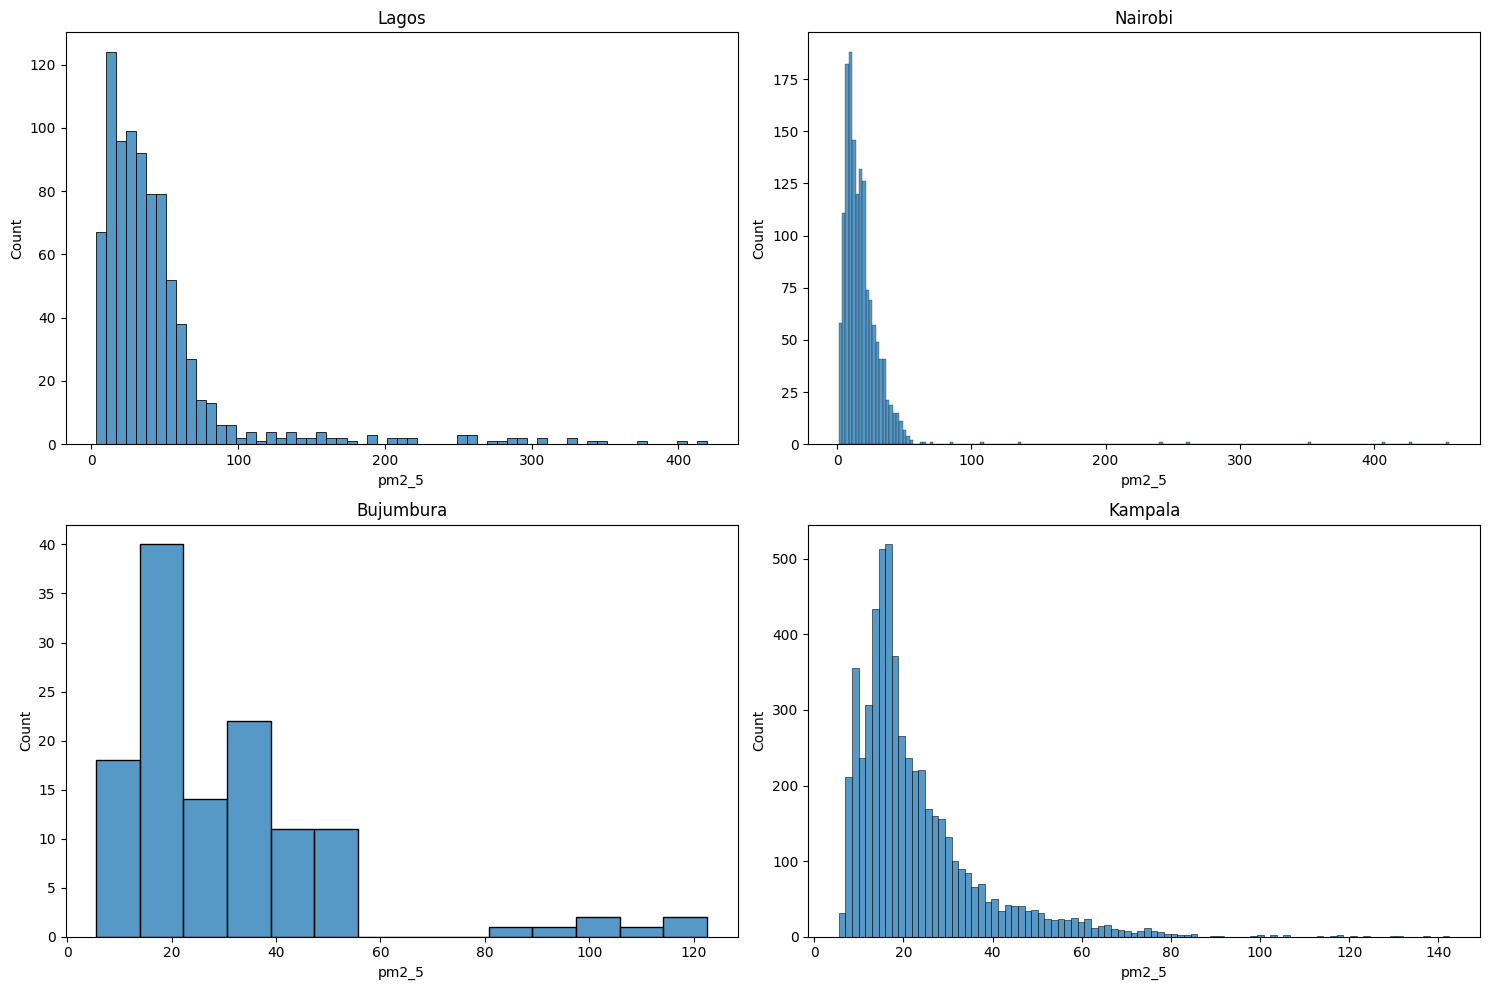

In [7]:
# plot a distribution plot for each of the cities in train

train_cities = train['city'].unique().tolist()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for city, ax in zip(train_cities, axes.flatten()):
    sns.histplot(train[train['city']==city]['pm2_5'], ax=ax)
    ax.set_title(city)

plt.tight_layout()


*Note: Now, we know each city doesn't have the same level of pm2.5* 

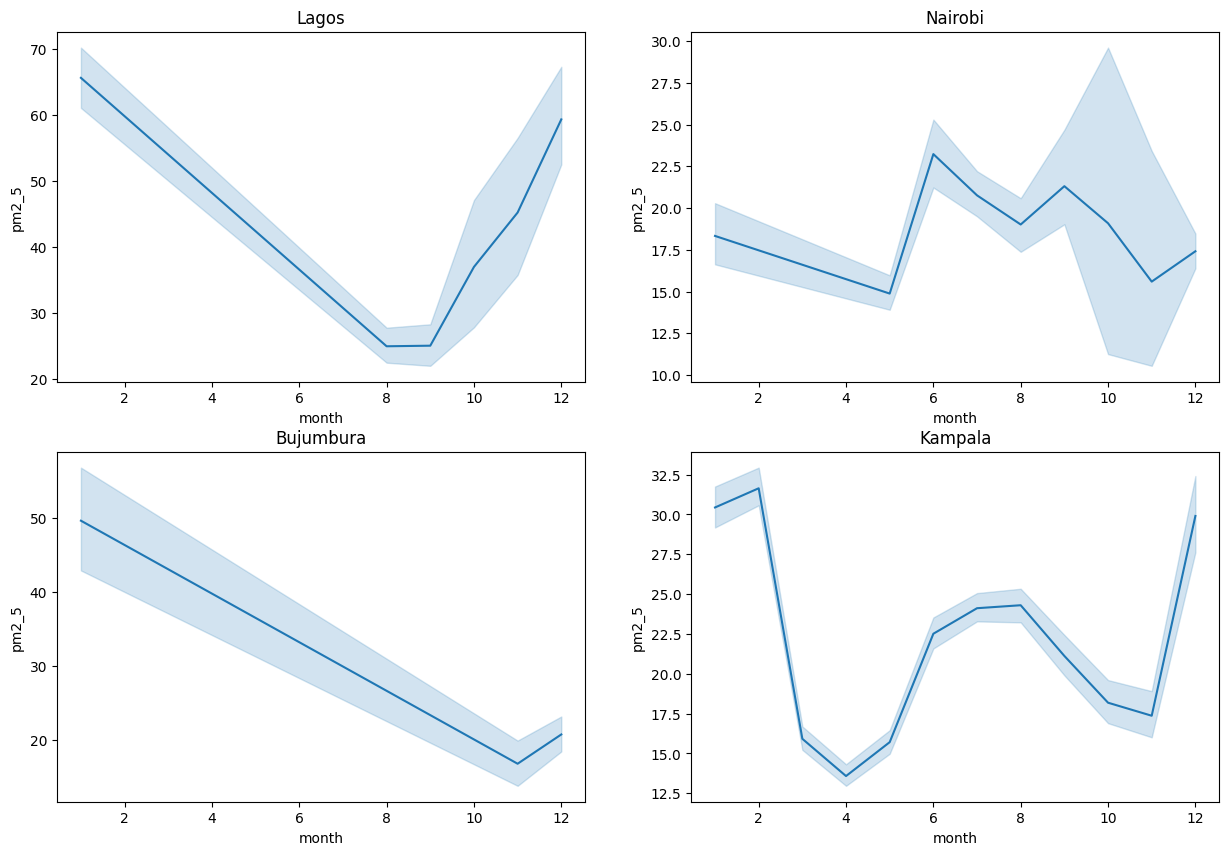

In [8]:
# What does the pm2.5 distribution for each city look like across time?

train['date'] = pd.to_datetime(train['date'])

# Across months
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for city, ax in zip(train_cities, axes.flatten()):
    selected_city = train[train['city']==city]
    sns.lineplot(y=selected_city['pm2_5'],x=selected_city['month'], ax=ax)
    ax.set_title(city)

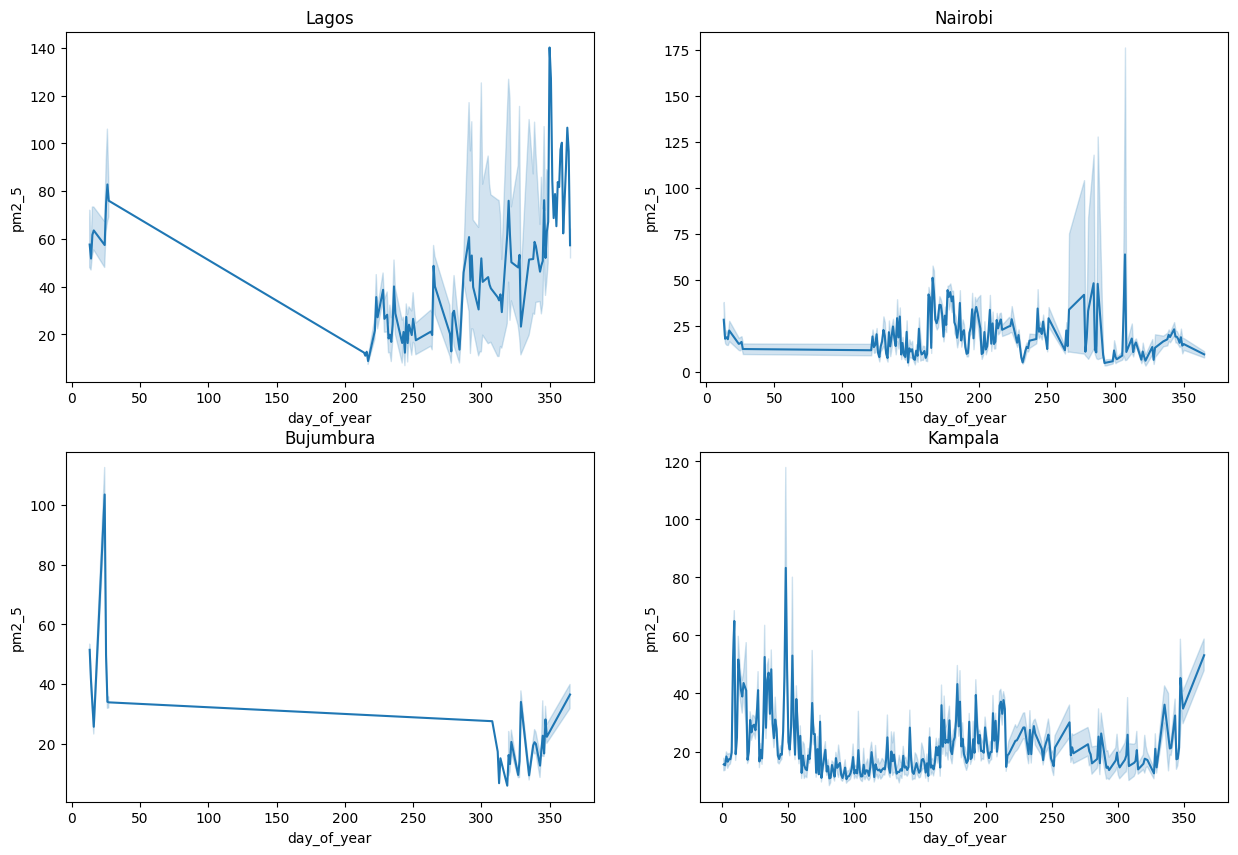

In [9]:
# Across days

train['day_of_year'] = train['date'].dt.day_of_year
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for city, ax in zip(train_cities, axes.flatten()):
    selected_city = train[train['city']==city]
    sns.lineplot(y=selected_city['pm2_5'],x=selected_city['day_of_year'], ax=ax)
    ax.set_title(city)

*Note: The first quarter of the year for Nairobi and Bujumbura are kind of stable with the day of the year* 

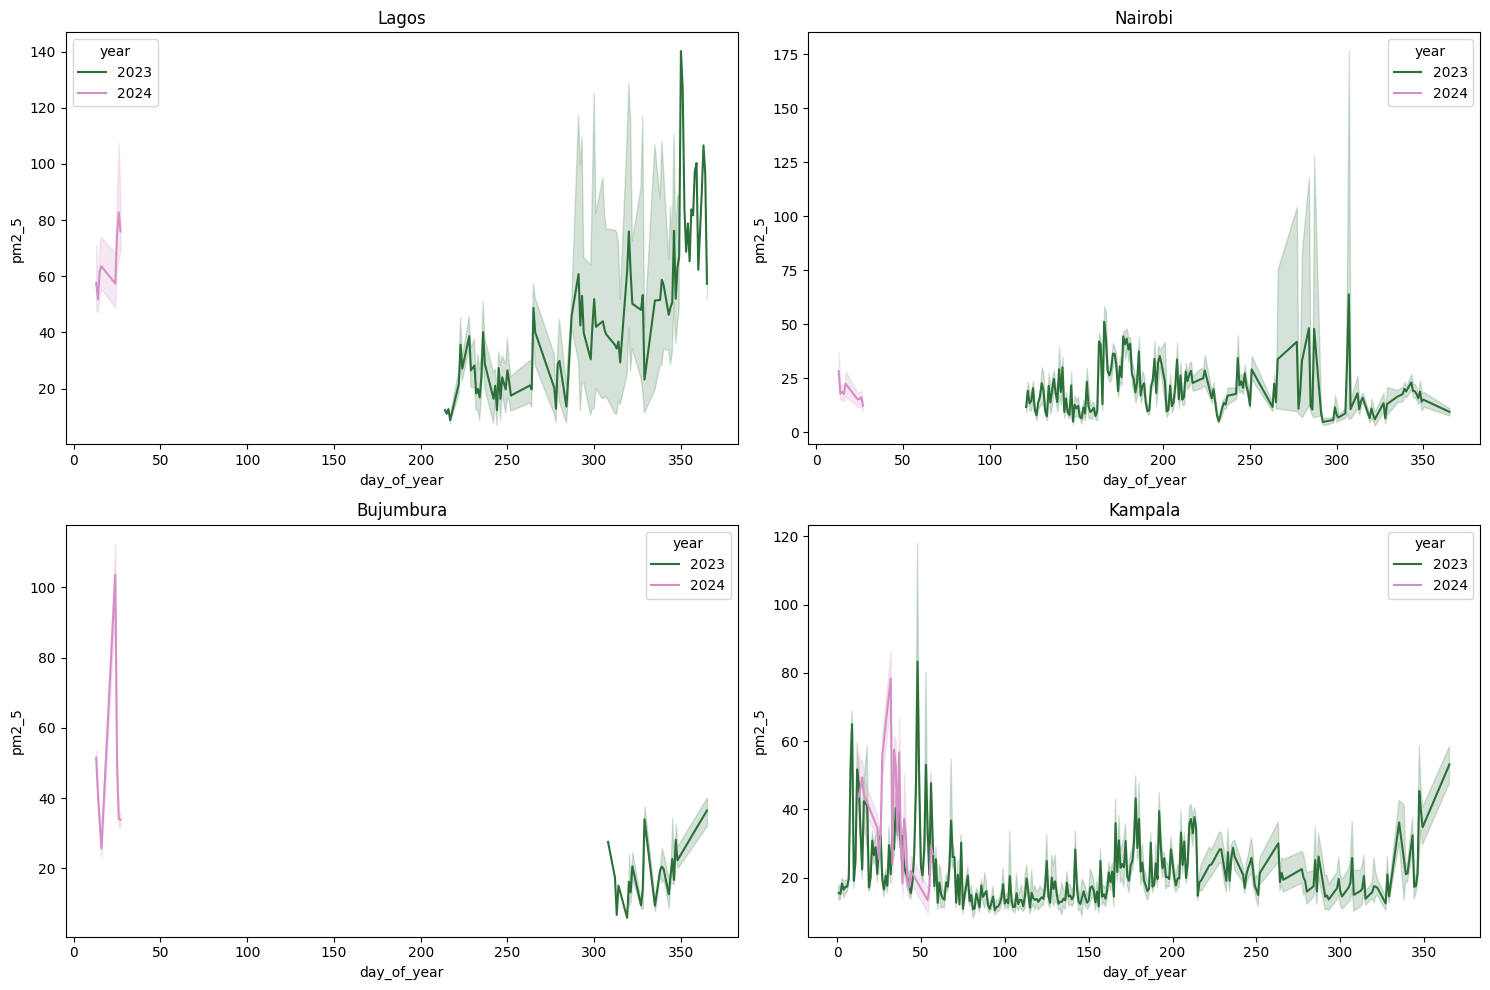

In [12]:
# plot the day of each year over each other for each city

palette = sns.color_palette("cubehelix", n_colors=2)

train['year'] = train['date'].dt.year

years = train['year'].unique().tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for city, ax in zip(train_cities, axes.flatten()):
    selected_city = train[(train['city'] == city)]
    sns.lineplot(y=selected_city['pm2_5'], 
                    x=selected_city['day_of_year'], 
                    ax=ax, 
                    hue='year',
                    data=selected_city, 
                    palette = palette
                    )
    ax.set_title(city)

plt.tight_layout()
plt.show()

Note: *We discovered that data doesn't exist between those days we found to be stable days for Nairobi and Bujumbura.*

Note: *However, it seems there is an overlap between days of the year for Kampala.*

Note: *Apart from Lagos city, it seems the day of the year across different city has some level of overlap*

In [13]:
# View the overlap between the days of the year for Kampala in year 2023 and 2024

import plotly.graph_objects as go

selected_city = train[(train['city'] == 'Kampala')]
fig = px.scatter(selected_city, x="day_of_year", y="pm2_5", color="year",
                 size='pm2_5')
fig.show()


<Axes: xlabel='day_of_year', ylabel='pm2_5'>

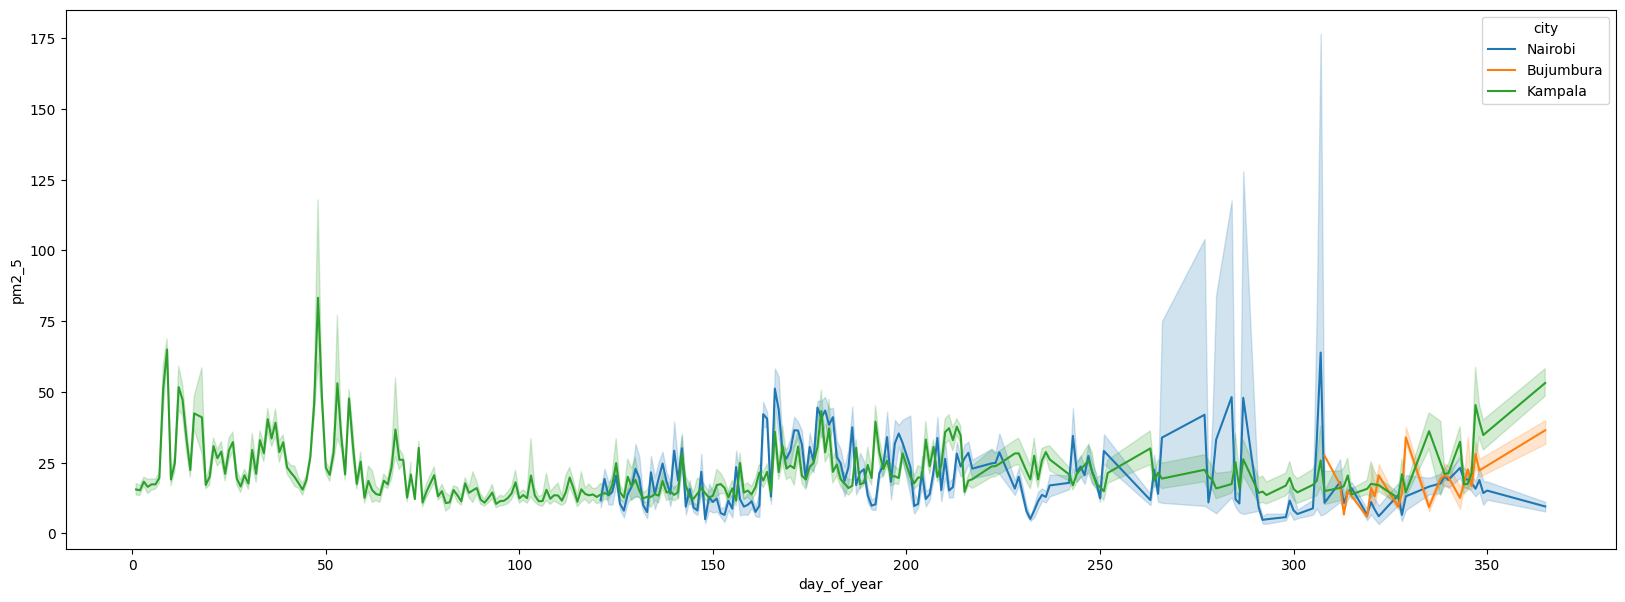

In [14]:
# Check the overlap between the level of pm2.5 for each city
plt.figure(figsize=(20, 7))
selected_city = train[(train['year']==2023) & (train['city'] != 'Lagos')]
sns.lineplot(x=selected_city['day_of_year'], y=selected_city['pm2_5'], hue=selected_city['city'])

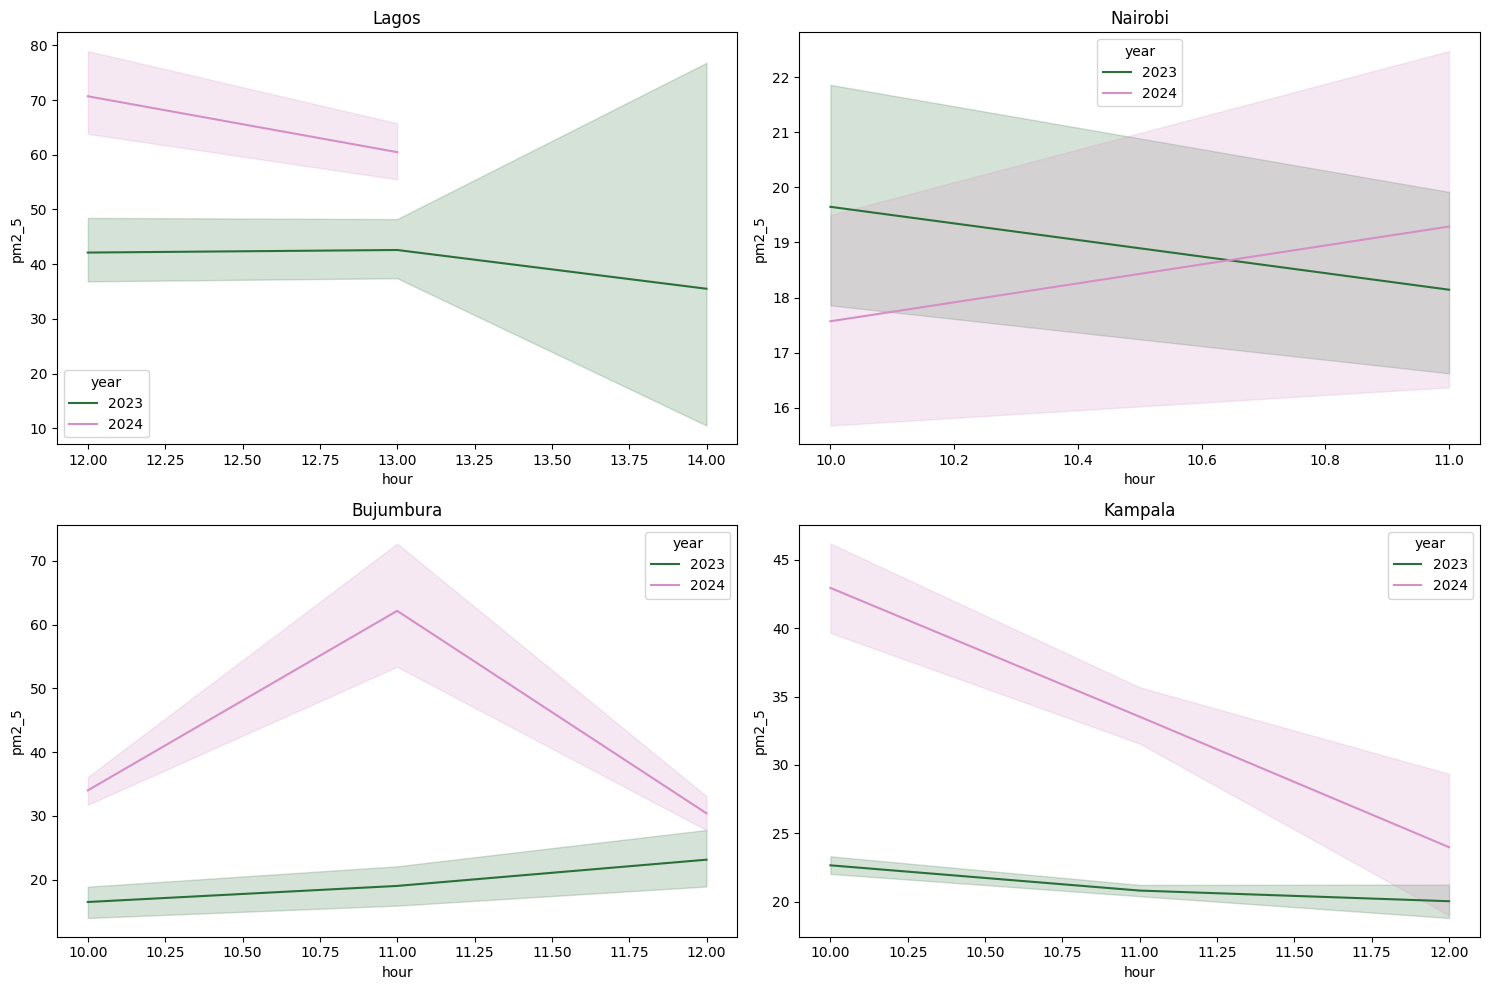

In [15]:
# Across hour

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for city, ax in zip(train_cities, axes.flatten()):
    selected_city = train[(train['city'] == city)]
    sns.lineplot(y=selected_city['pm2_5'], 
                    x=selected_city['hour'], 
                    ax=ax, 
                    hue='year',
                    data=selected_city, 
                    palette = palette
                    )
    ax.set_title(city)

plt.tight_layout()
plt.show()
